In [1]:
# Import necessary libraries
import pandas as pd
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Read the CSV file into a DataFrame
df = pd.read_csv('NewData.csv')



df.head()
df.isnull().sum()

duplicate_rows = df.duplicated()
print("\nDuplicate rows:")
print(duplicate_rows.sum())

# Check for consistency in data types
data_types = df.dtypes
print("\nData types:")
print(data_types)


# Get only categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterate over each categorical column
for column in categorical_columns:
    # Print the column name and its distinct values
    print(f"Distinct values of {column}:")
    print(df[column].unique())
    print()


Duplicate rows:
0

Data types:
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size             

### Max, min, and average values of numerical columns

Maximum values:
Customer Lifetime Value          83325.381190
Income                           99981.000000
Monthly Premium Auto               298.000000
Months Since Last Claim             35.000000
Months Since Policy Inception       99.000000
Number of Open Complaints            5.000000
Number of Policies                   9.000000
Total Claim Amount                2893.239678
dtype: float64

Minimum values:
Customer Lifetime Value          1898.007675
Income                              0.000000
Monthly Premium Auto               61.000000
Months Since Last Claim             0.000000
Months Since Policy Inception       0.000000
Number of Open Complaints           0.000000
Number of Policies                  1.000000
Total Claim Amount                  0.099007
dtype: float64

Average values:
Customer Lifetime Value           8004.940475
Income                           37657.380009
Monthly Premium Auto                93.219291
Months Since Last Claim             15.097000
Months S

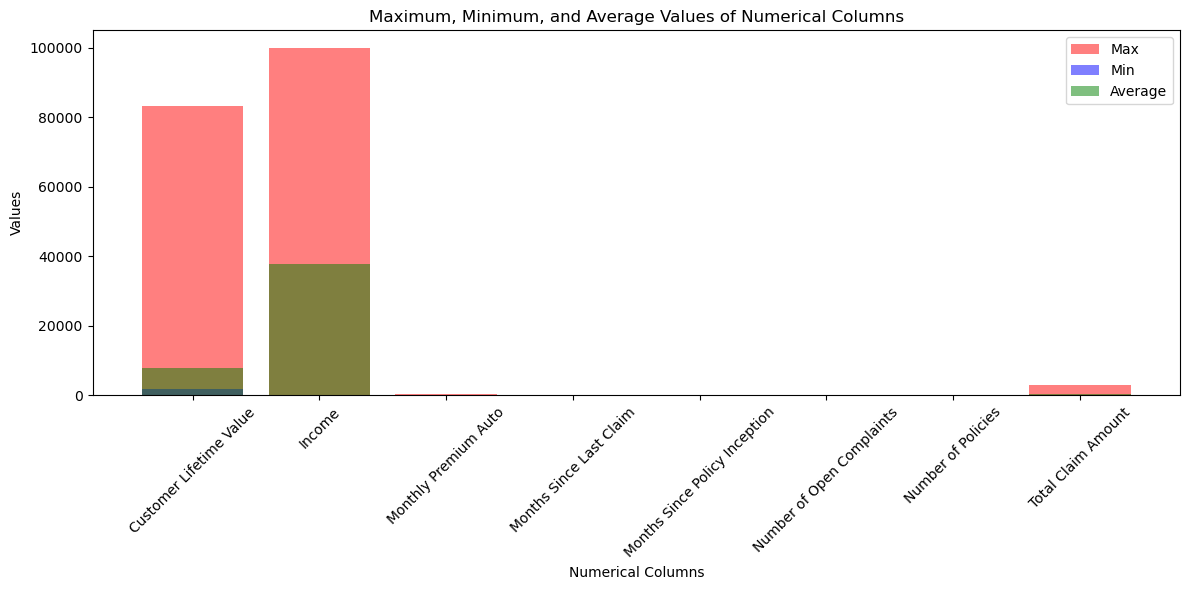

No duplicate rows found.
       Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                

In [2]:
# Calculate max, min, and average values of numerical columns
max_values = df.select_dtypes(include='number').max()
min_values = df.select_dtypes(include='number').min()
average_values = df.select_dtypes(include='number').mean()

# Print the results
print("Maximum values:")
print(max_values)
print("\nMinimum values:")
print(min_values)
print("\nAverage values:")
print(average_values)




# Calculate max, min, and average values of numerical columns
max_values = df.select_dtypes(include='number').max()
min_values = df.select_dtypes(include='number').min()
average_values = df.select_dtypes(include='number').mean()

# Define numerical column names
numerical_columns = max_values.index

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(numerical_columns, max_values, color='red', alpha=0.5, label='Max')
plt.bar(numerical_columns, min_values, color='blue', alpha=0.5, label='Min')
plt.bar(numerical_columns, average_values, color='green', alpha=0.5, label='Average')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.title('Maximum, Minimum, and Average Values of Numerical Columns')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Check for duplicate rows in the entire DataFrame
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

# Calculate summary statistics for numerical columns
summary_statistics = df.describe()

# Print summary statistics
print(summary_statistics)

#R/s b/w numeical and categorical features: boxplots, scatterplots, bar graphs, frequency distributions



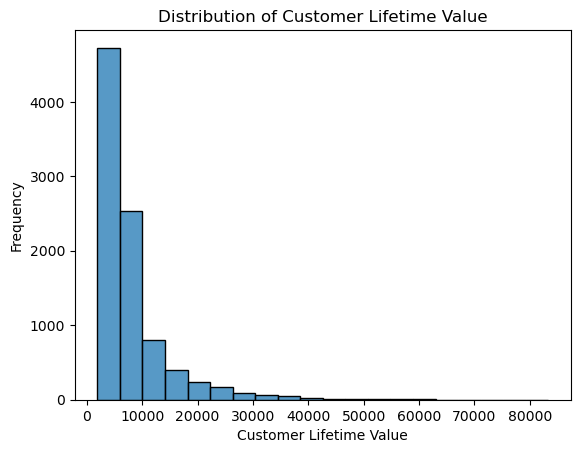

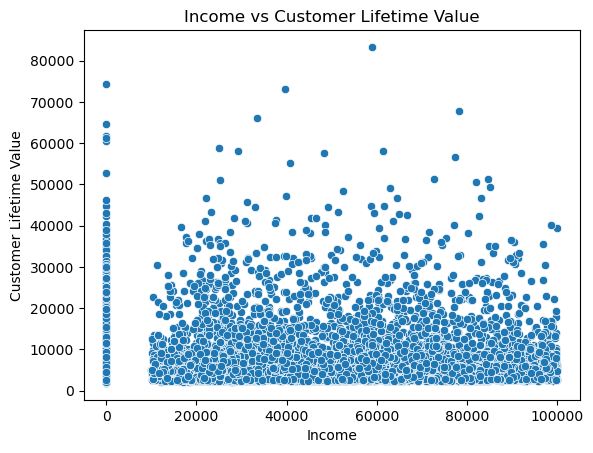

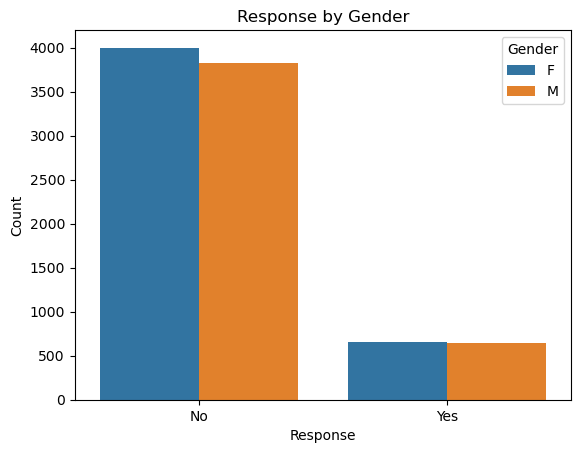

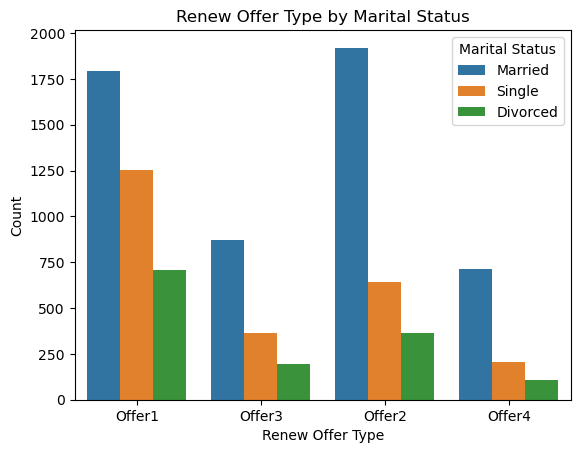

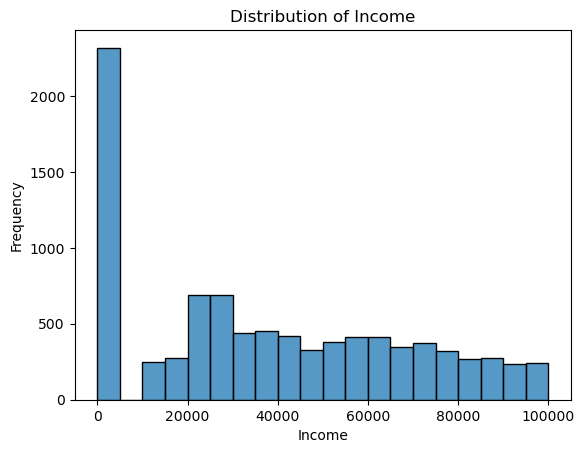

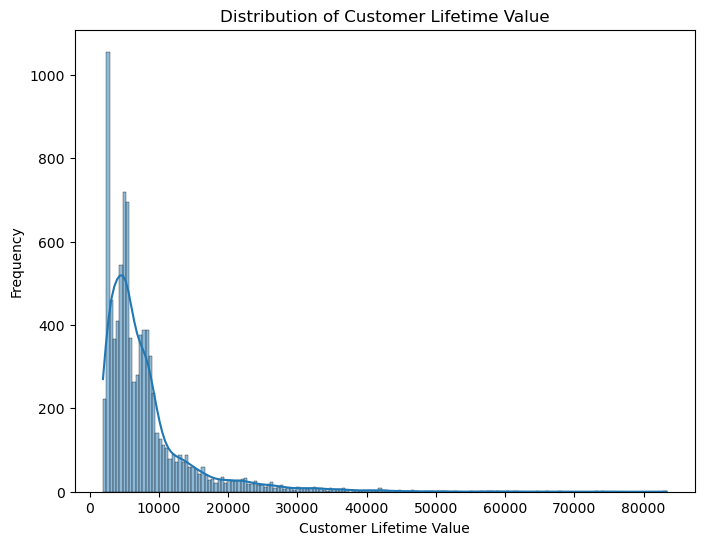

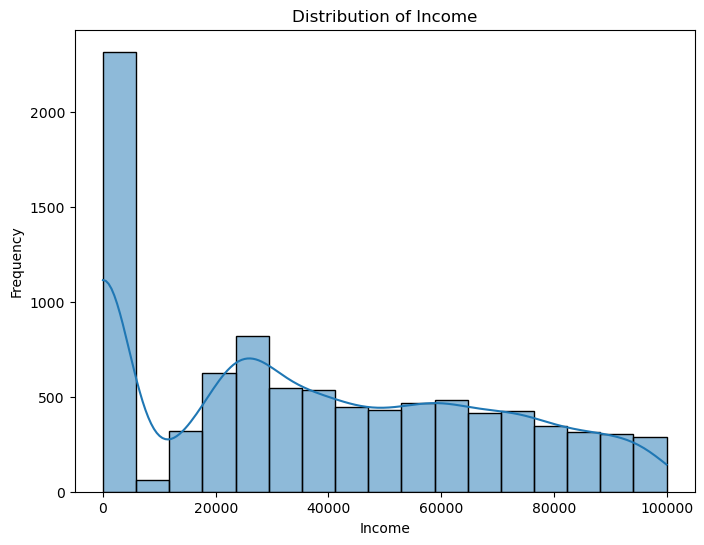

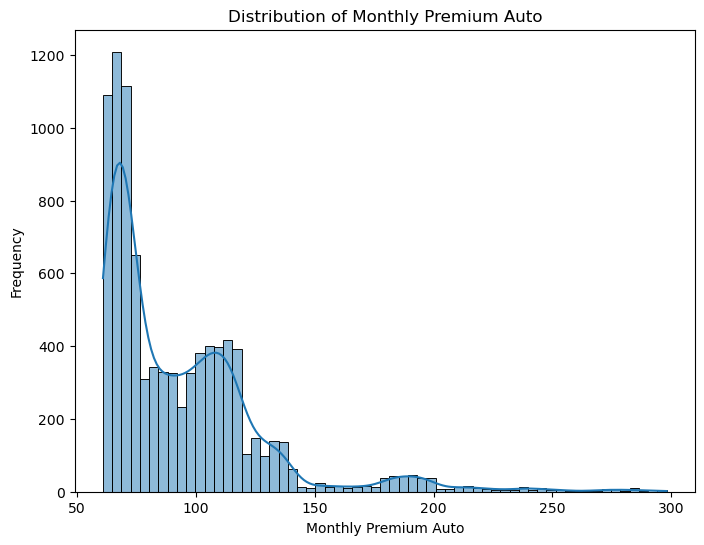

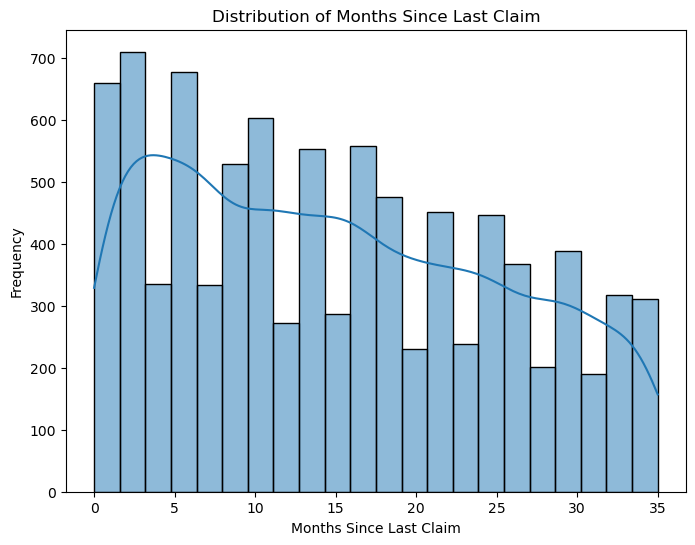

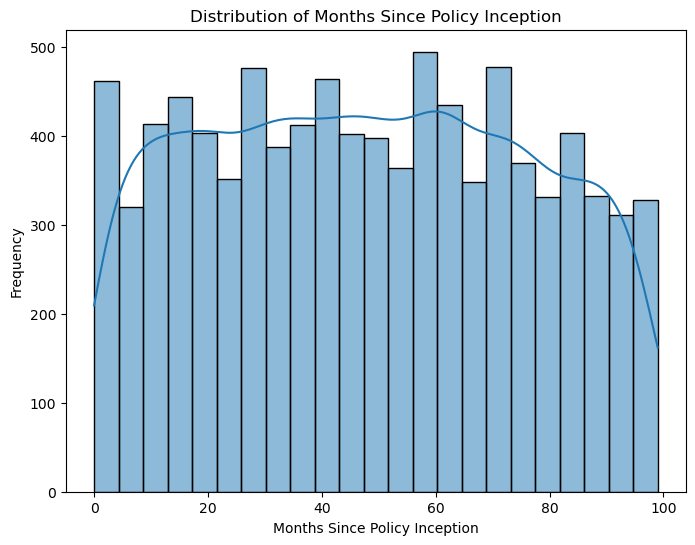

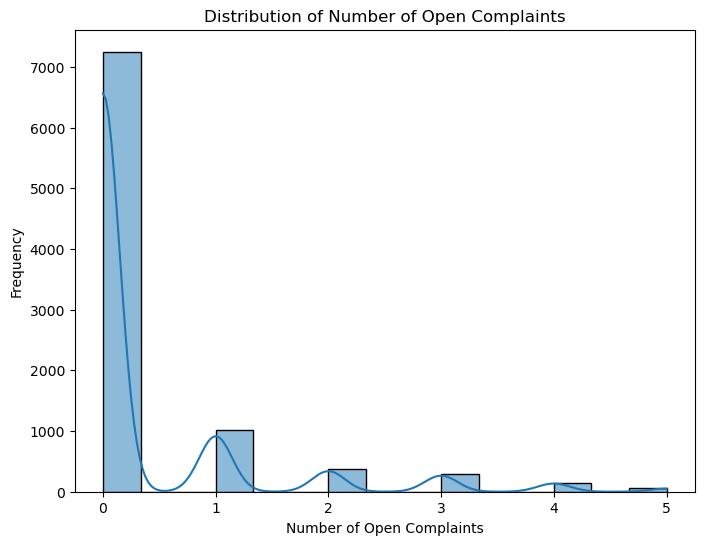

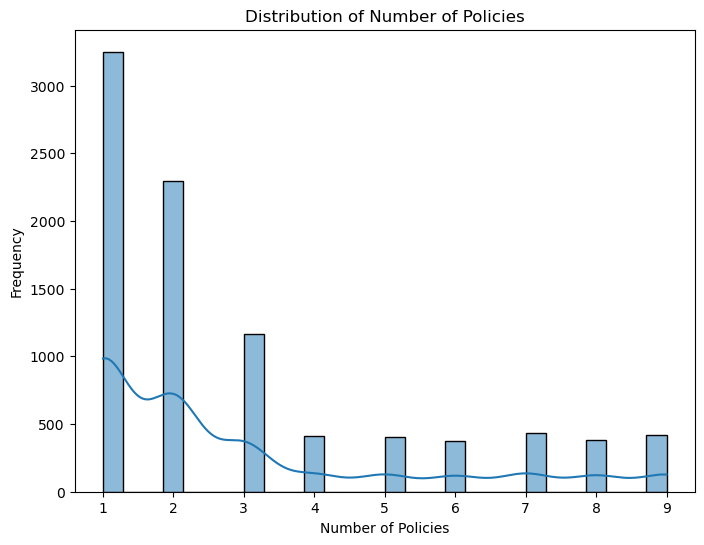

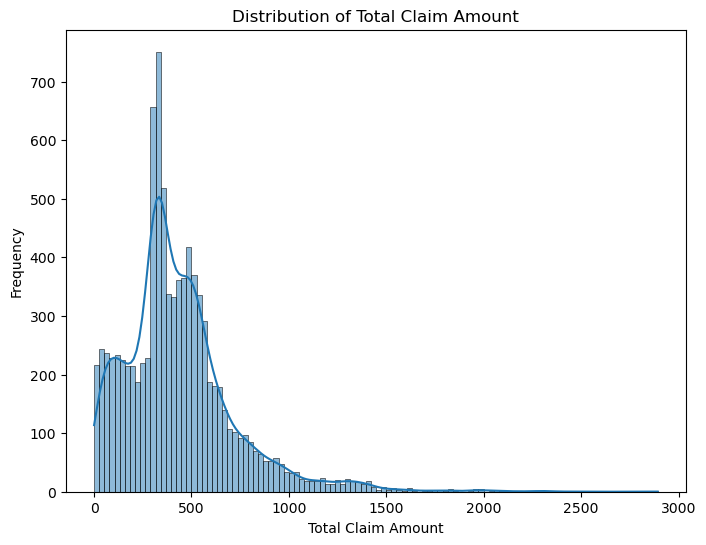

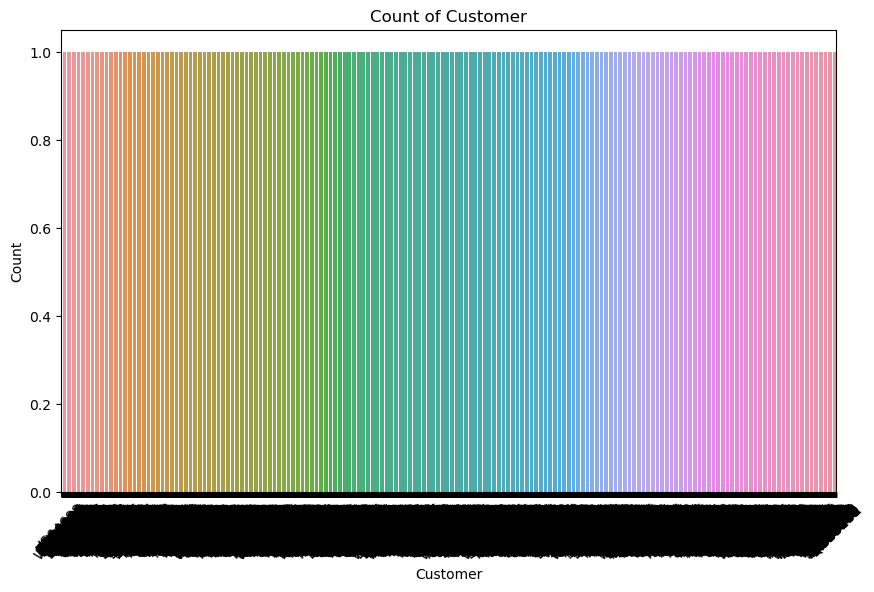

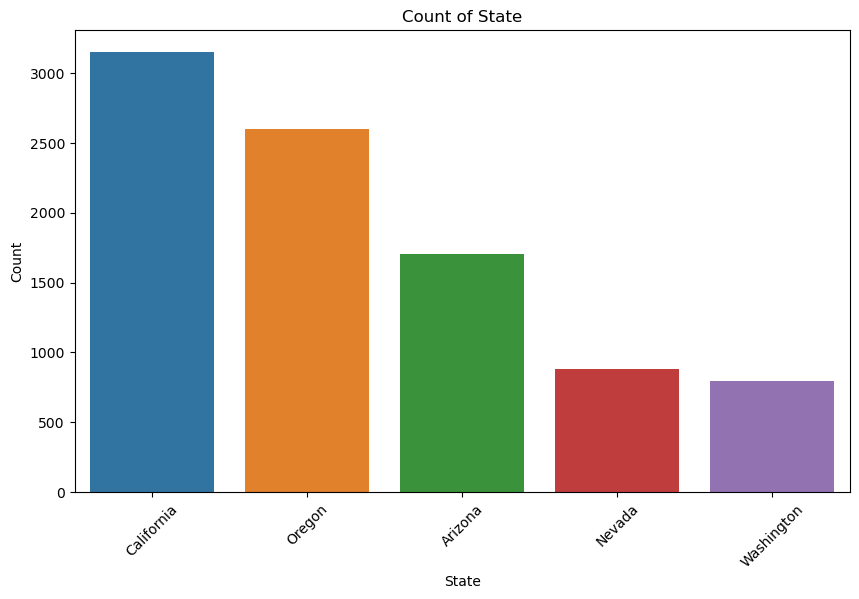

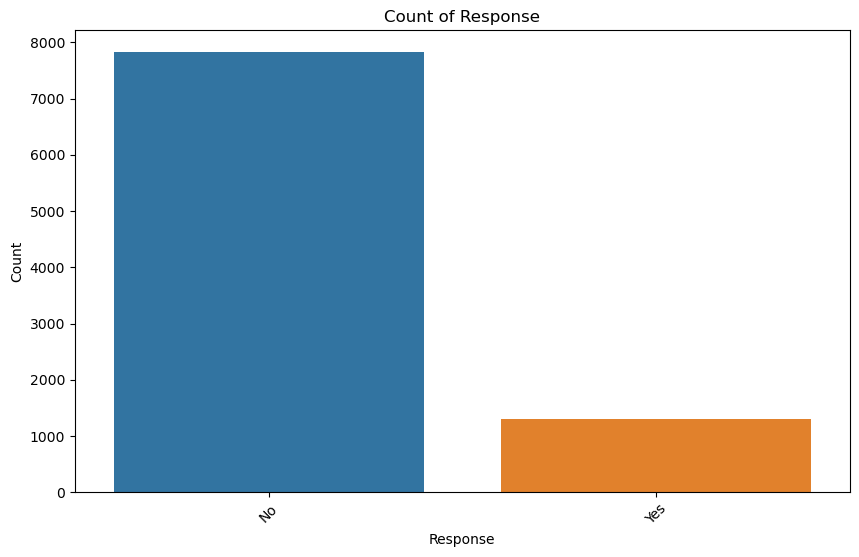

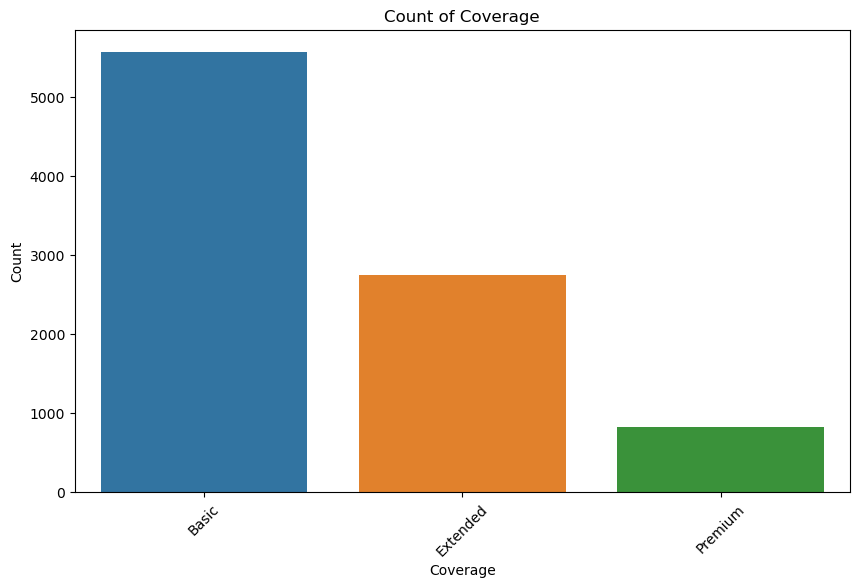

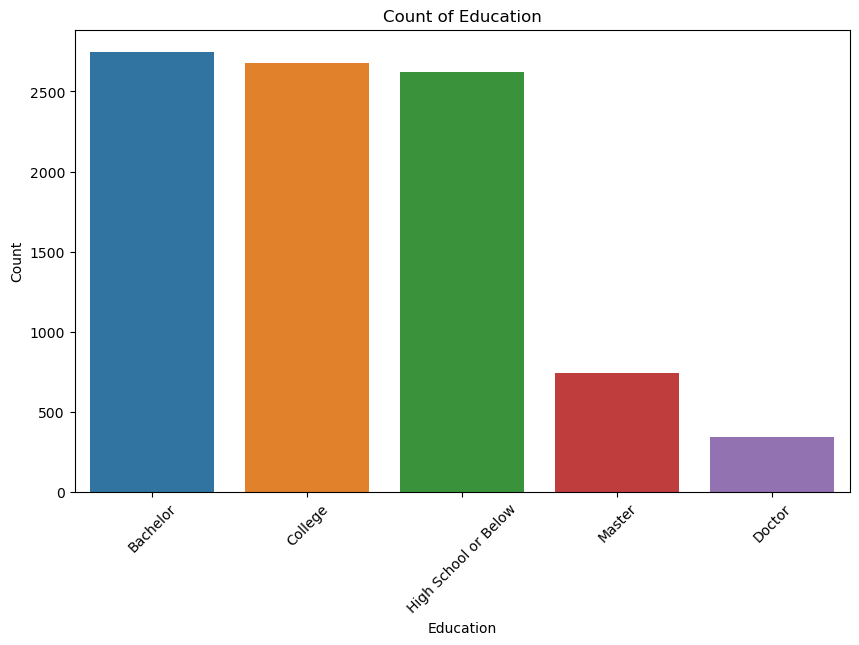

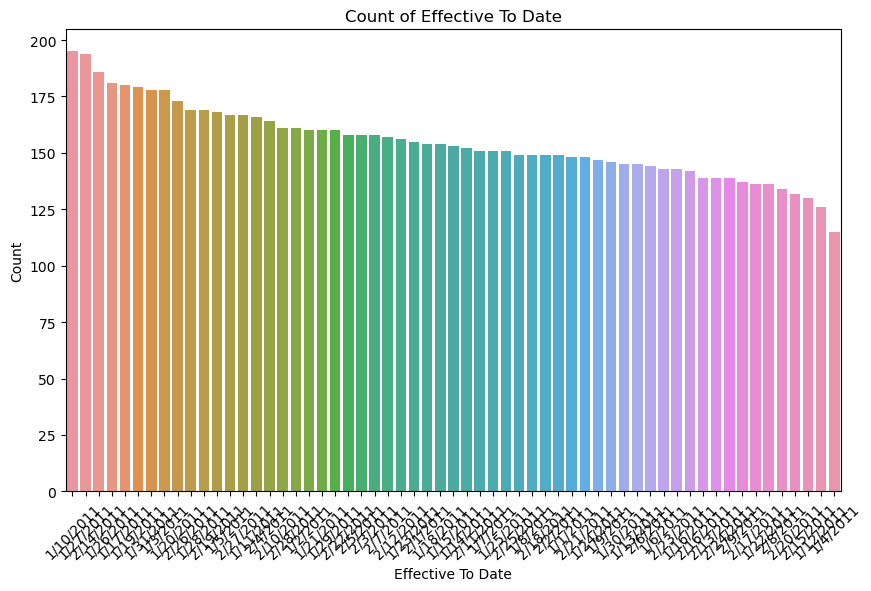

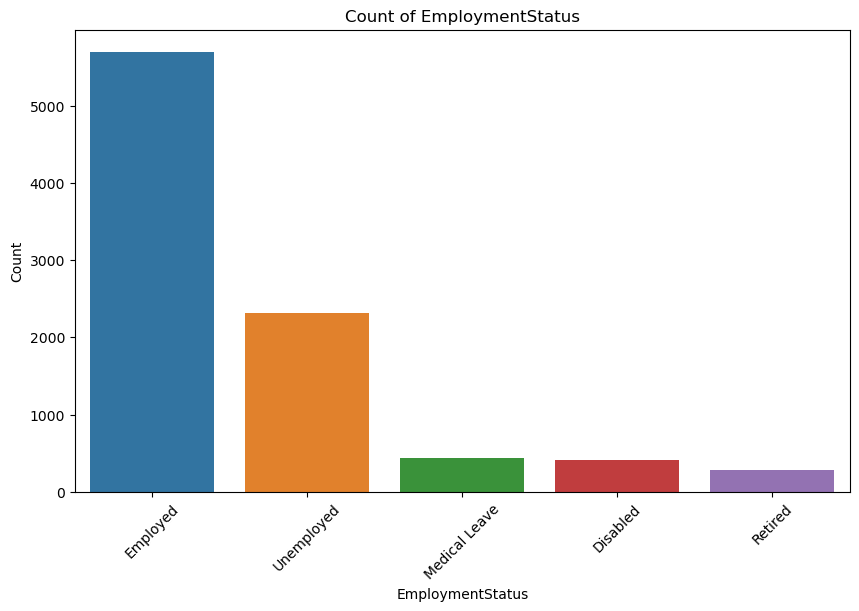

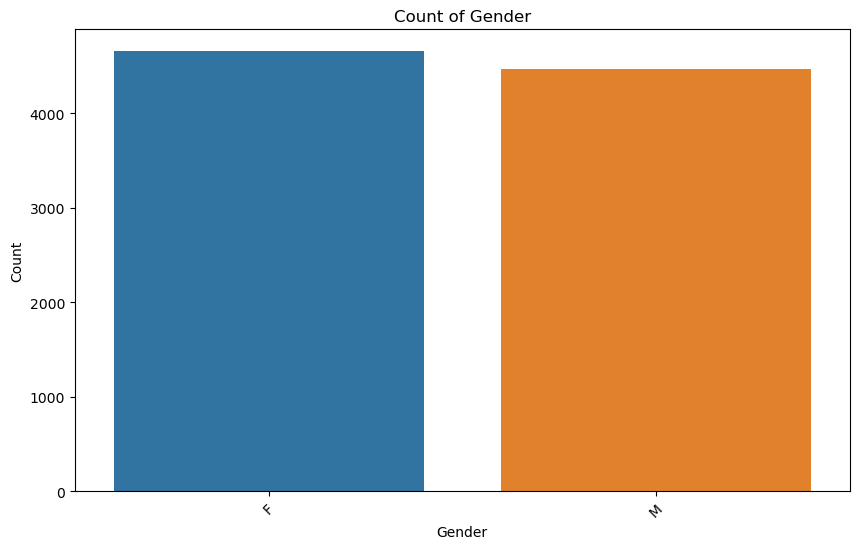

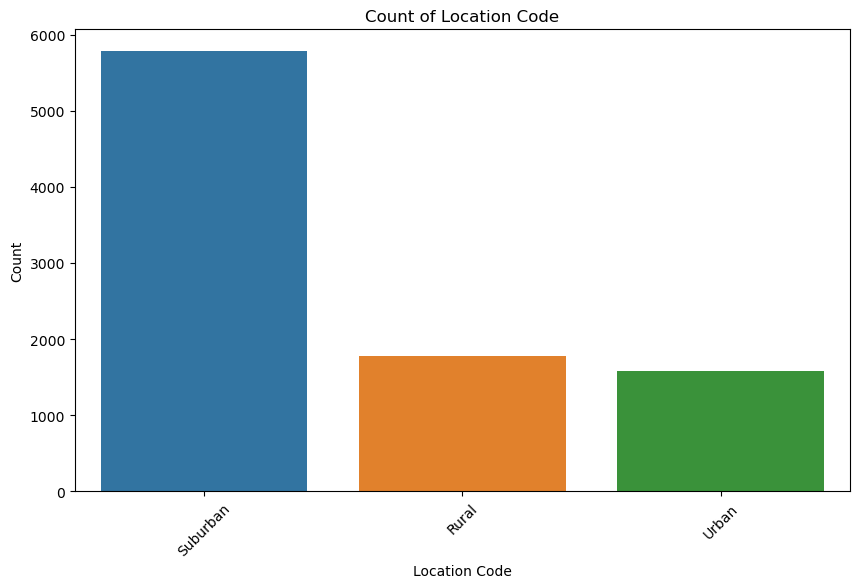

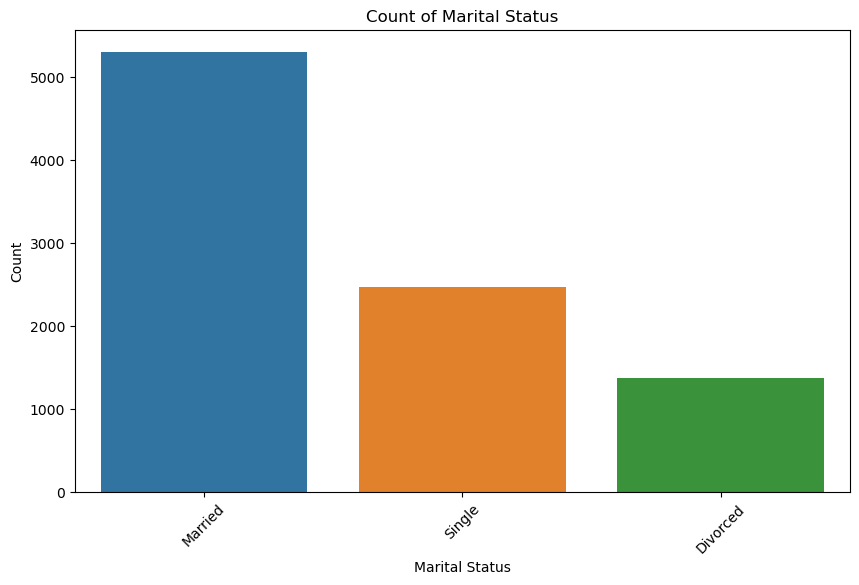

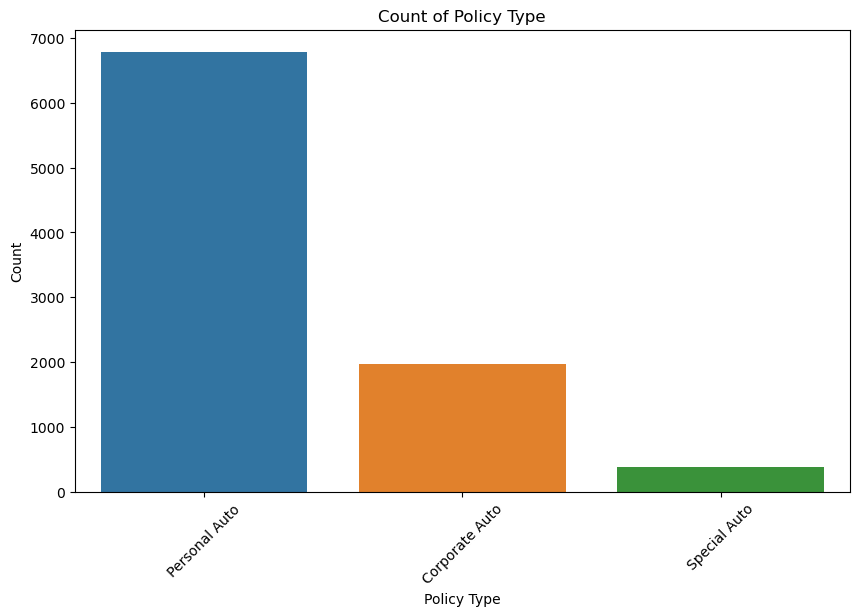

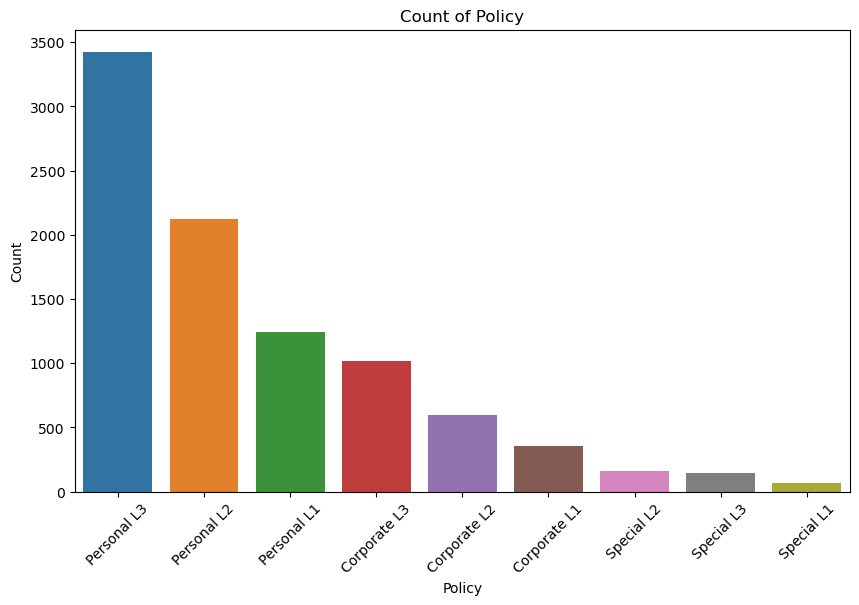

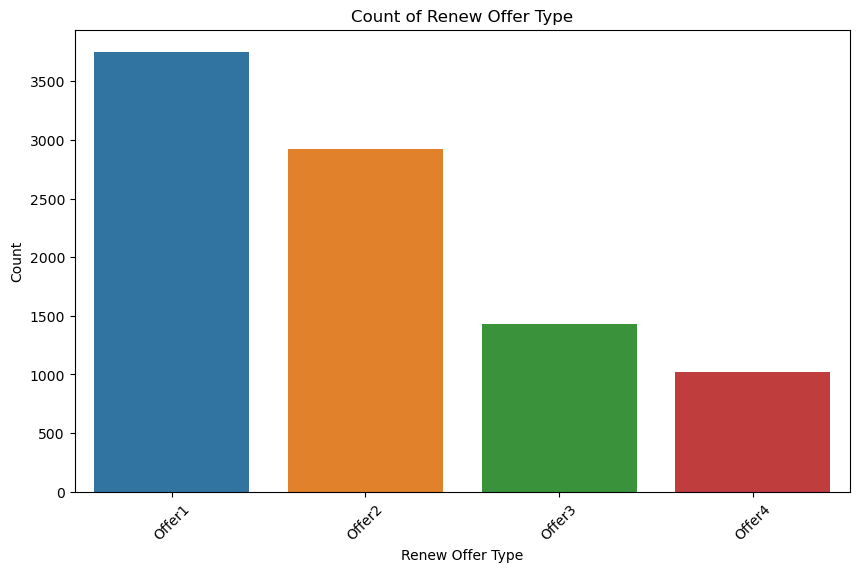

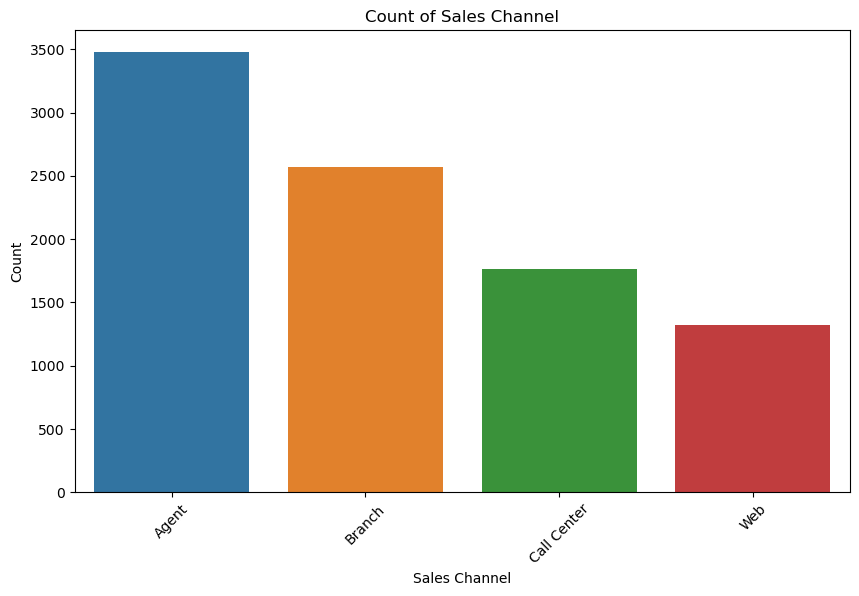

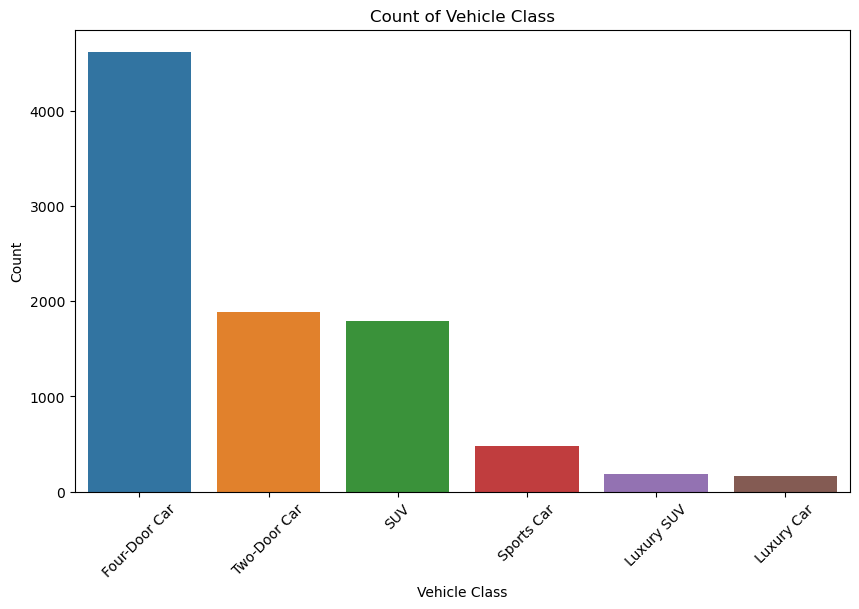

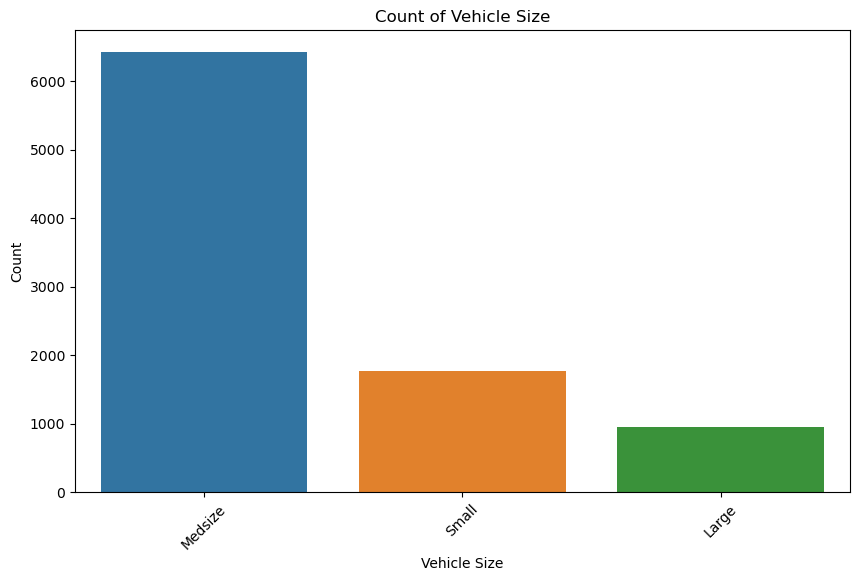

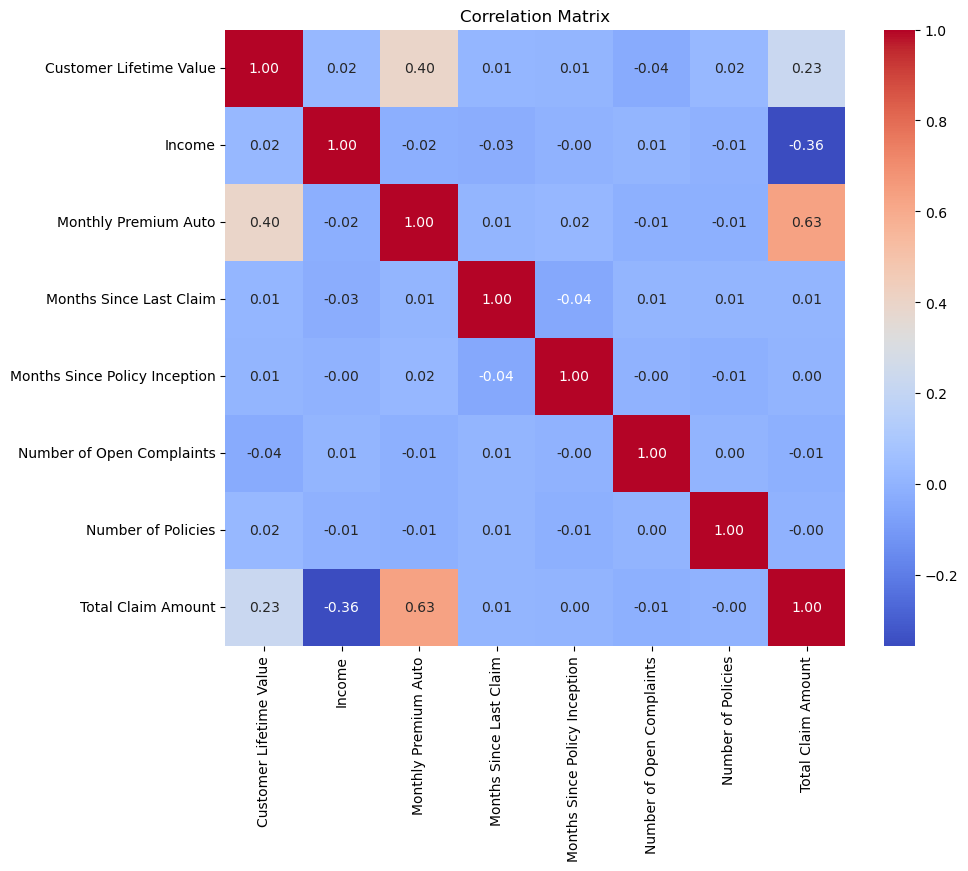

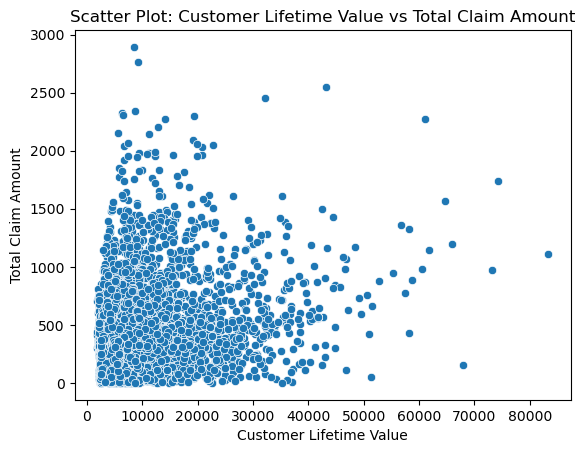

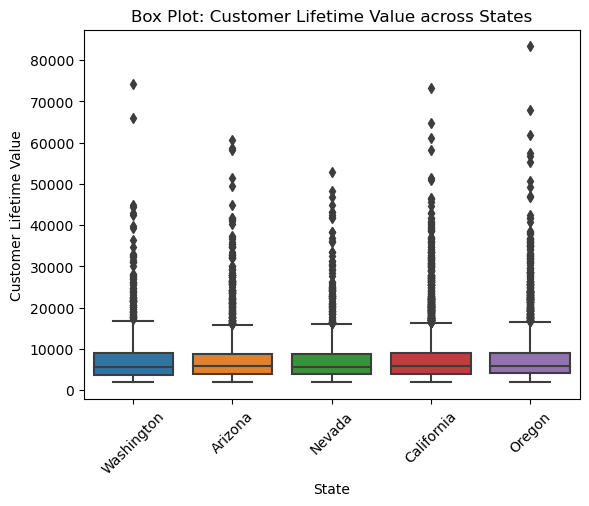

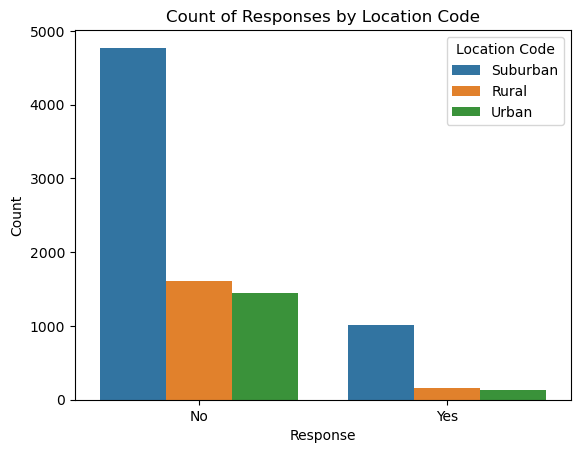

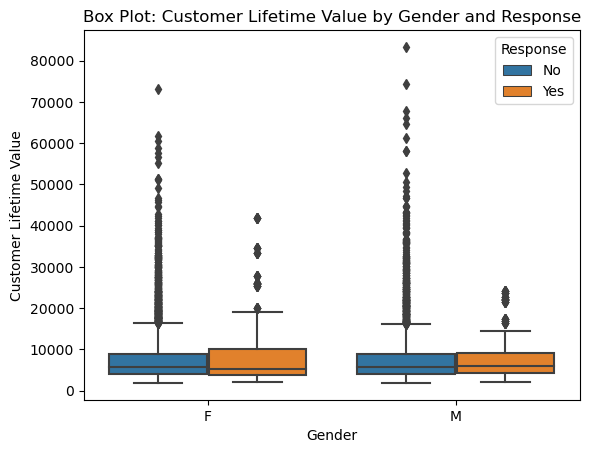

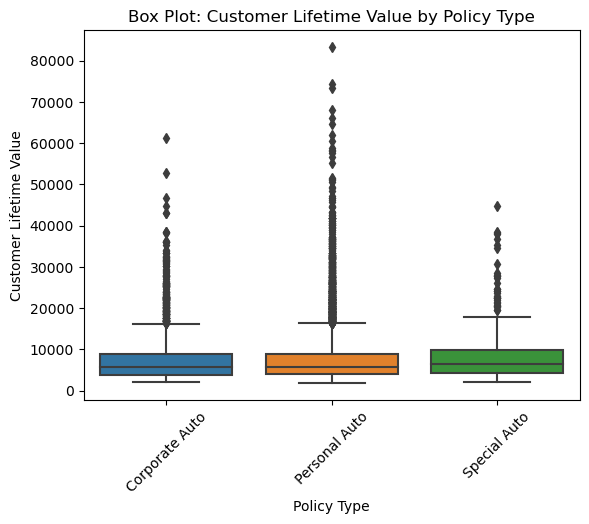

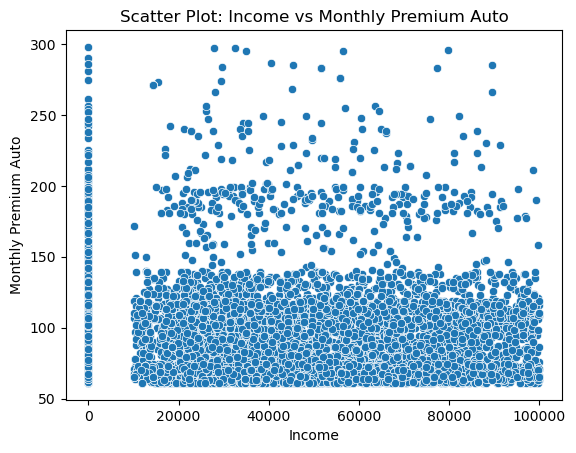

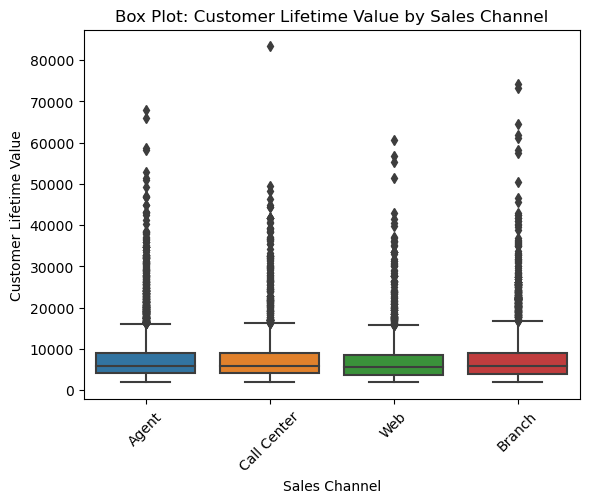

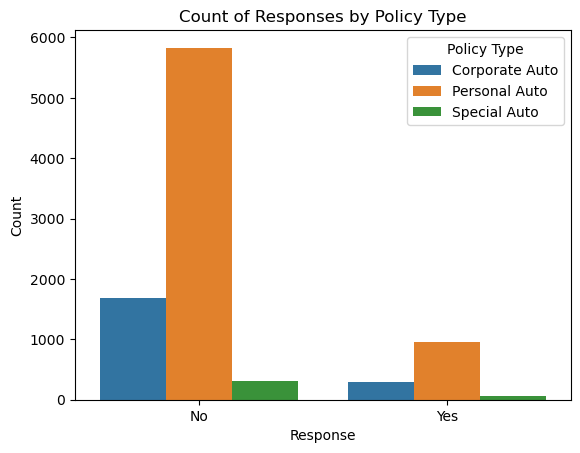

Chi-square statistic: 17.43173735637985
P-value: 0.00016396317825410515


In [3]:
# Distribution of numerical features
sns.histplot(df['Customer Lifetime Value'], bins=20)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()

# Relationship between numerical features
sns.scatterplot(data=df, x='Income', y='Customer Lifetime Value')
plt.title('Income vs Customer Lifetime Value')
plt.xlabel('Income')
plt.ylabel('Customer Lifetime Value')
plt.show()


# Relationship between categorical features
sns.countplot(data=df, x='Response', hue='Gender')
plt.title('Response by Gender')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='Renew Offer Type', hue='Marital Status')
plt.title('Renew Offer Type by Marital Status')
plt.xlabel('Renew Offer Type')
plt.ylabel('Count')
plt.show()


# In[18]:


sns.histplot(df['Income'], bins=20)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


# Plot histograms for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Categorical columns in the dataset
categorical_columns = df.select_dtypes(include=['object']).columns

# Plotting counts of each category in categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# In[43]:


# Correlation matrix
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# In[61]:


# Scatter plot between 'Customer Lifetime Value' and 'Total Claim Amount'
sns.scatterplot(data=df, x='Customer Lifetime Value', y='Total Claim Amount')
plt.title('Scatter Plot: Customer Lifetime Value vs Total Claim Amount')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Total Claim Amount')
plt.show()

# Box plot of 'Customer Lifetime Value' across 'State'
sns.boxplot(data=df, x='State', y='Customer Lifetime Value')
plt.title('Box Plot: Customer Lifetime Value across States')
plt.xlabel('State')
plt.ylabel('Customer Lifetime Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Count plot of 'Response' by 'Location Code'
sns.countplot(data=df, x='Response', hue='Location Code')
plt.title('Count of Responses by Location Code')
plt.xlabel('Response')
plt.ylabel('Count')
plt.legend(title='Location Code')
plt.show()

# Box plot of 'Customer Lifetime Value' by 'Gender' and 'Response'
sns.boxplot(data=df, x='Gender', y='Customer Lifetime Value', hue='Response')
plt.title('Box Plot: Customer Lifetime Value by Gender and Response')
plt.xlabel('Gender')
plt.ylabel('Customer Lifetime Value')
plt.legend(title='Response')
plt.show()


# In[63]:


# Box plot of 'Customer Lifetime Value' by 'Policy Type'
sns.boxplot(data=df, x='Policy Type', y='Customer Lifetime Value')
plt.title('Box Plot: Customer Lifetime Value by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Customer Lifetime Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Scatter plot between 'Income' and 'Monthly Premium Auto'
sns.scatterplot(data=df, x='Income', y='Monthly Premium Auto')
plt.title('Scatter Plot: Income vs Monthly Premium Auto')
plt.xlabel('Income')
plt.ylabel('Monthly Premium Auto')
plt.show()

# Box plot of 'Customer Lifetime Value' by 'Sales Channel'
sns.boxplot(data=df, x='Sales Channel', y='Customer Lifetime Value')
plt.title('Box Plot: Customer Lifetime Value by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Customer Lifetime Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Count plot of 'Response' by 'Policy Type'
sns.countplot(data=df, x='Response', hue='Policy Type')
plt.title('Count of Responses by Policy Type')
plt.xlabel('Response')
plt.ylabel('Count')
plt.legend(title='Policy Type')
plt.show()





# In[65]:


from scipy.stats import chi2_contingency

# Example: Chi-square test for Gender and Marital Status
contingency_table = pd.crosstab(df['Gender'], df['Marital Status'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")


# In[72]:

## Chi Square Test

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame containing the dataset

# List of categorical columns
categorical_columns = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
                       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
                       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

# Define significance level (alpha)
alpha = 0.05

# Perform chi-square tests for all combinations of pairs of categorical variables
results = []
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        contingency_table = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        significance = 'Yes' if p < alpha else 'No'
        results.append([categorical_columns[i], categorical_columns[j], chi2, p, significance])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Chi-Square', 'P-value', 'Significant'])
# Save results to a CSV file
results_df.to_csv('chi_square_results.csv', index=False)


# Display results
print(results_df)


          Variable 1        Variable 2  Chi-Square       P-value Significant
0              State          Response    0.438478  9.792072e-01          No
1              State          Coverage    3.257710  9.171595e-01          No
2              State         Education   16.602614  4.117509e-01          No
3              State  EmploymentStatus    4.783644  9.967284e-01          No
4              State            Gender    1.195250  8.788800e-01          No
..               ...               ...         ...           ...         ...
86  Renew Offer Type     Vehicle Class  120.053969  1.847395e-18         Yes
87  Renew Offer Type      Vehicle Size    6.482411  3.713706e-01          No
88     Sales Channel     Vehicle Class   34.362948  3.027417e-03         Yes
89     Sales Channel      Vehicle Size    7.788101  2.540423e-01          No
90     Vehicle Class      Vehicle Size   24.661719  6.024951e-03         Yes

[91 rows x 5 columns]


#Boxplots


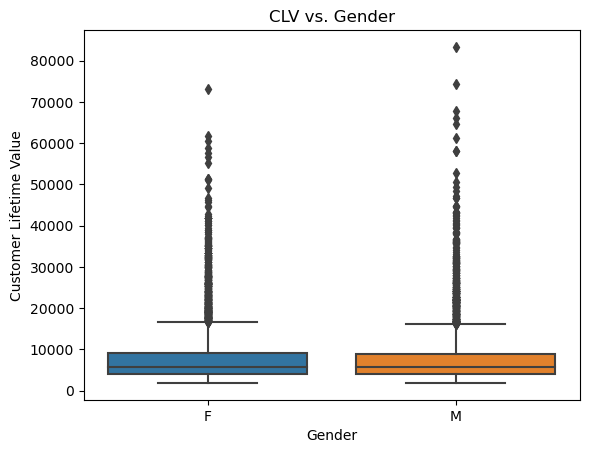

In [5]:
# Bivariate Analysis: Customer Lifetime Value (CLV) vs. Gender
sns.boxplot(x='Gender', y='Customer Lifetime Value', data=df)
plt.title('CLV vs. Gender')
plt.show()

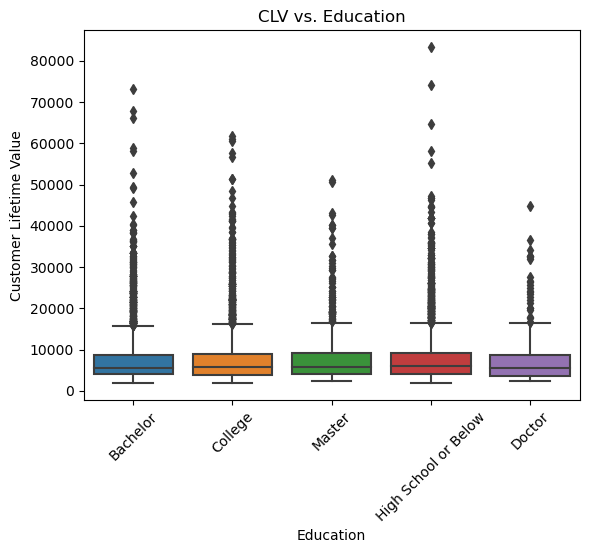

In [6]:
# Bivariate Analysis: Customer Lifetime Value (CLV) vs. Education
sns.boxplot(x='Education', y='Customer Lifetime Value', data=df)
plt.title('CLV vs. Education')
plt.xticks(rotation=45)
plt.show()

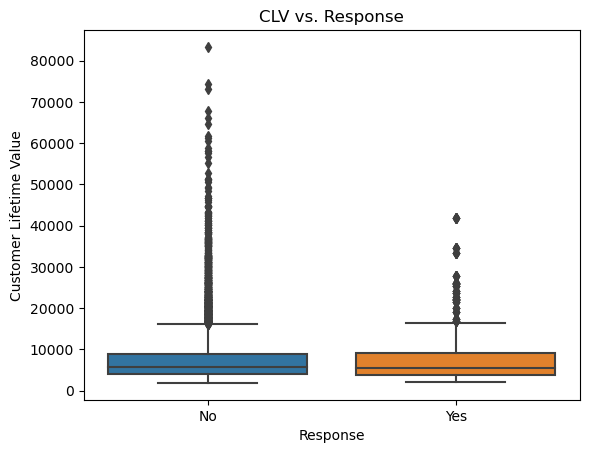

In [7]:

# Bivariate Analysis: Customer Lifetime Value (CLV) vs. Response
sns.boxplot(x='Response', y='Customer Lifetime Value', data=df)
plt.title('CLV vs. Response')
plt.show()

#ANOVA Tests

In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the formula for the ANOVA test
formula = 'Customer_Lifetime_Value ~ C(State) + C(Response) + C(Coverage) + C(Education) + C(EmploymentStatus) + C(Gender) + C(Policy) '

# Fit the ANOVA model
model = ols(formula, data=df).fit()

# Perform ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

# Store significant tests in a DataFrame
significance = pd.DataFrame({'Variable': anova_table.index,
                             'Significant': anova_table['PR(>F)'] < 0.05})

# Print whether tests are significant or not
for index, row in significance.iterrows():
    if row['Significant']:
        print(f"{row['Variable']} test is significant")
    else:
        print(f"{row['Variable']} test is not significant")

# Save significance information to a CSV file
significance.to_csv('anova_significance.csv', index=False)


PatsyError: Error evaluating factor: NameError: name 'Customer_Lifetime_Value' is not defined
    Customer_Lifetime_Value ~ C(State) + C(Response) + C(Coverage) + C(Education) + C(EmploymentStatus) + C(Gender) + C(Policy)
    ^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:

!pip install plotly

import plotly.express as px

In [16]:
import pandas as pd

# Assuming edu_df is a DataFrame with Education and Customer columns
edu_df = pd.DataFrame({
    'Education': ['High School', 'College', 'Graduate', 'Post-Graduate'],
    'Customer': [100, 200, 300, 400]
})

# Now you can use edu_df in Plotly Express visualization
import plotly.express as px

fig = px.bar(edu_df, x='Education', y='Customer')
fig.update_layout(title_text="Education distribution", barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()


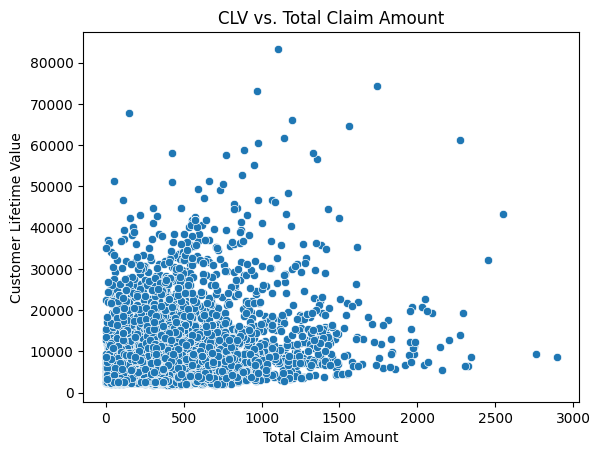

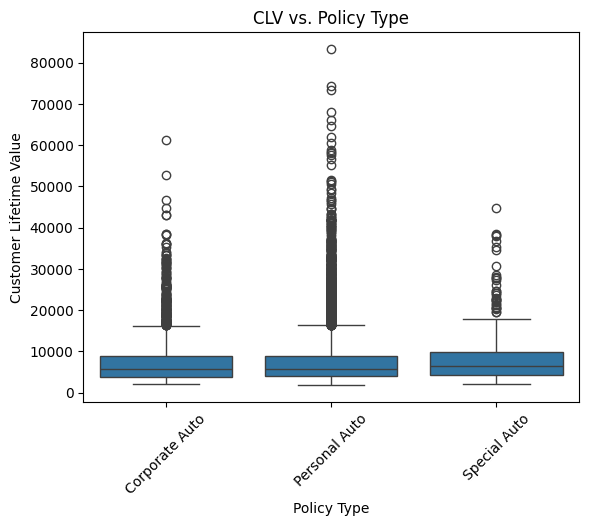

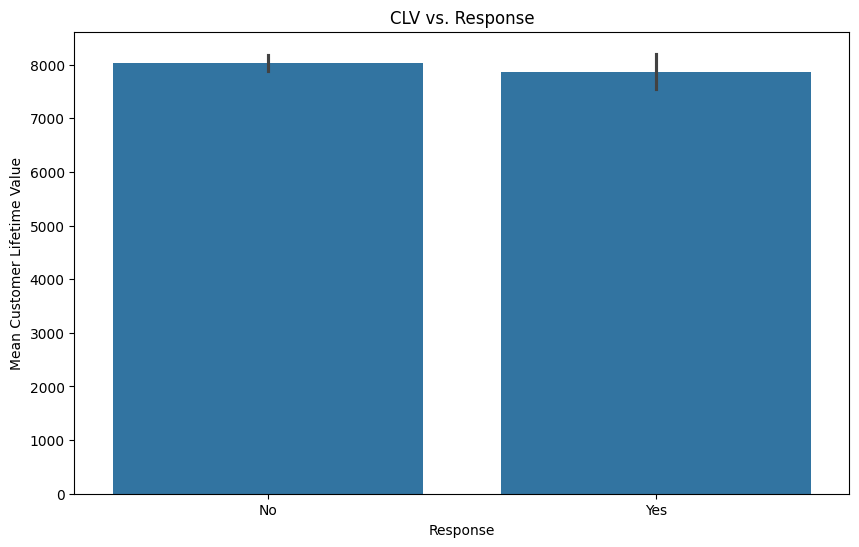

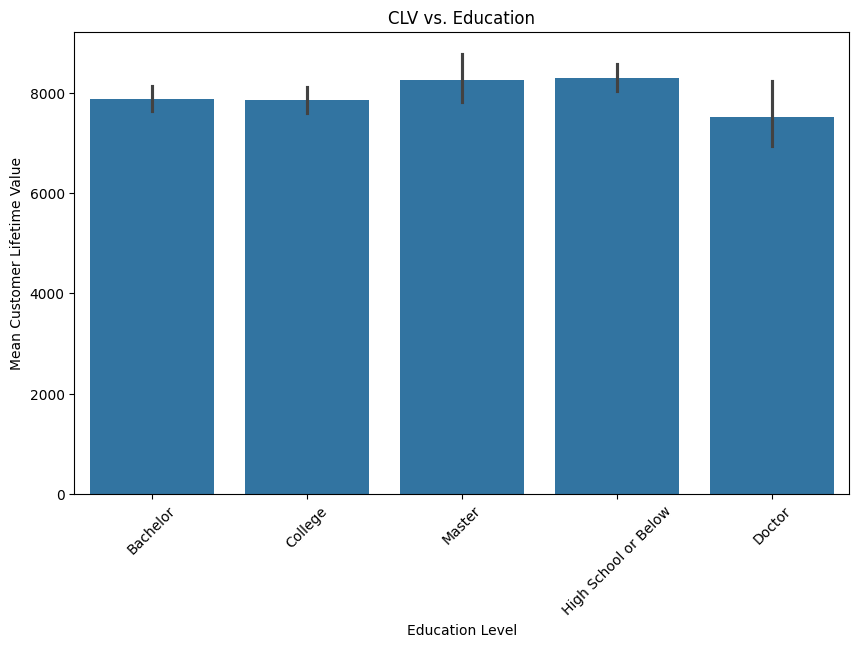

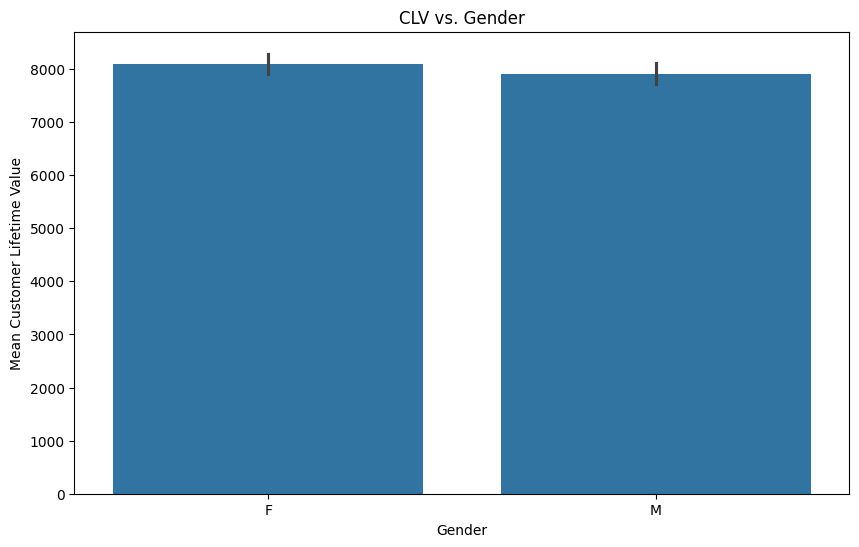

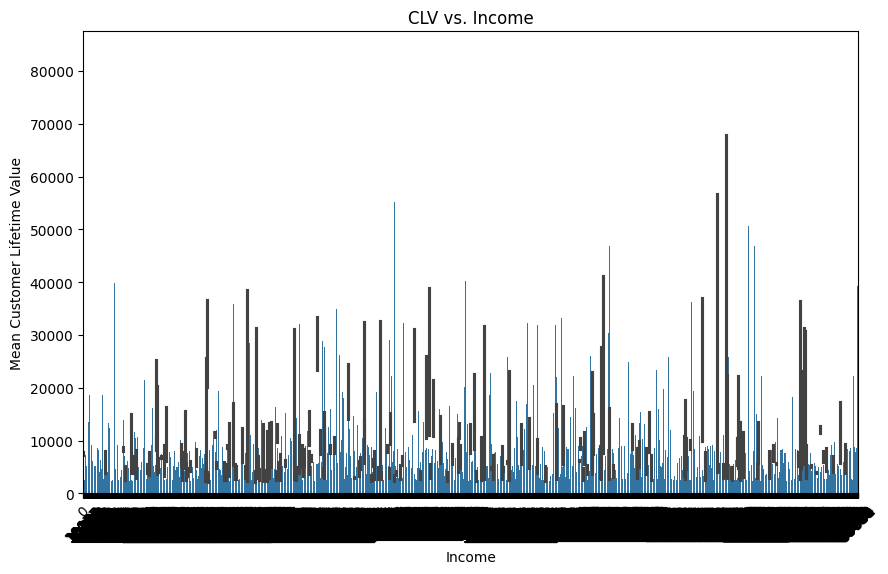

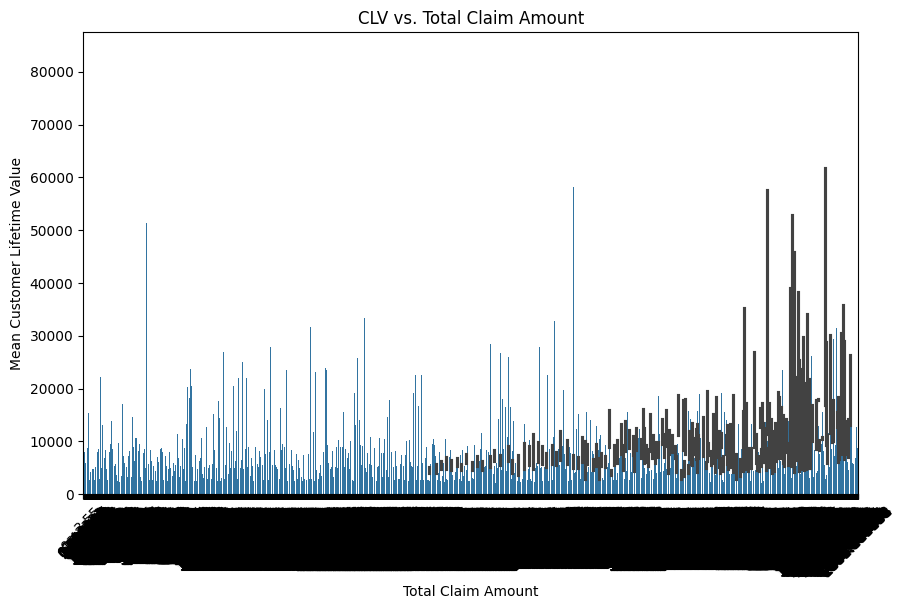

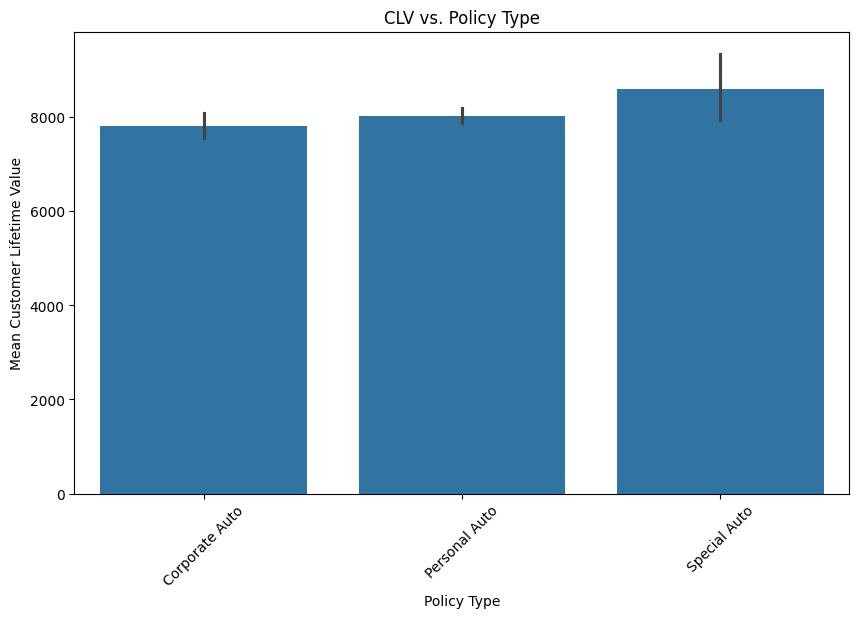

In [17]:

# Bivariate Analysis: Customer Lifetime Value (CLV) vs. Total Claim Amount
sns.scatterplot(x='Total Claim Amount', y='Customer Lifetime Value', data=df)
plt.title('CLV vs. Total Claim Amount')
plt.show()

# Bivariate Analysis: Customer Lifetime Value (CLV) vs. Policy Type
sns.boxplot(x='Policy Type', y='Customer Lifetime Value', data=df)
plt.title('CLV vs. Policy Type')
plt.xticks(rotation=45)
plt.show()


# Set the figure size
plt.figure(figsize=(10, 6))

# Bivariate Analysis: Customer Lifetime Value (CLV) vs. Response
sns.barplot(x='Response', y='Customer Lifetime Value', data=df, estimator=np.mean)
plt.title('CLV vs. Response')
plt.xlabel('Response')
plt.ylabel('Mean Customer Lifetime Value')
plt.show()


fig = px.bar(edu_df, x='Education', y='Customer')
fig.update_layout(title_text="Education distribution", barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()


# Set the figure size
plt.figure(figsize=(10, 6))

# Bivariate Analysis: Customer Lifetime Value (CLV) vs. Education
sns.barplot(x='Education', y='Customer Lifetime Value', data=df, estimator=np.mean)
plt.title('CLV vs. Education')
plt.xlabel('Education Level')
plt.ylabel('Mean Customer Lifetime Value')
plt.xticks(rotation=45)
plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Bivariate Analysis: Customer Lifetime Value (CLV) vs. Gender
sns.barplot(x='Gender', y='Customer Lifetime Value', data=df, estimator=np.mean)
plt.title('CLV vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Customer Lifetime Value')
plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Bivariate Analysis: Customer Lifetime Value (CLV) vs. Income
sns.barplot(x='Income', y='Customer Lifetime Value', data=df, estimator=np.mean)
plt.title('CLV vs. Income')
plt.xlabel('Income')
plt.ylabel('Mean Customer Lifetime Value')
plt.xticks(rotation=45)
plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Bivariate Analysis: Customer Lifetime Value (CLV) vs. Total Claim Amount
sns.barplot(x='Total Claim Amount', y='Customer Lifetime Value', data=df, estimator=np.mean)
plt.title('CLV vs. Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Mean Customer Lifetime Value')
plt.xticks(rotation=45)
plt.show()


# Set the figure size
plt.figure(figsize=(10, 6))

# Bivariate Analysis: Customer Lifetime Value (CLV) vs. Policy Type
sns.barplot(x='Policy Type', y='Customer Lifetime Value', data=df, estimator=np.mean)
plt.title('CLV vs. Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Mean Customer Lifetime Value')
plt.xticks(rotation=45)
plt.show()


fig = px.bar(edu_df, x='Education', y='Customer')
fig.update_layout(title_text="Education distribution", barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()
